In [316]:
using Plots

In [317]:
function golden_section(f, a, b, eps=0.01)
    Fi = (1+5^0.5)/2
    while true
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2
        end
    end
end
function norm(a)
    su = 0 
    for i ∈ a
        su += i^2
    end
    return su^(1/2)
end

norm (generic function with 1 method)

In [318]:
function dfdx(f, x,y, h)
    return (f(x+h,y)-f(x-h,y))/(2*h)
end
function dfdy(f, x,y, h)
    return (f(x,y+h)-f(x,y-h))/(2*h)
end

function grad_d(f,start,alpha, eps, h)
    x_i = copy(start)
    hist = [copy(start)]
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        x_i1 = x_i-alpha*grad
        x_i = x_i1
        push!(hist, copy(x_i))
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

grad_d (generic function with 1 method)

In [319]:
function score_grad_d(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        alpha = golden_section(nk_f(x_i, grad), 0, 1)
        x_i1 = x_i-alpha*grad
        x_i = x_i1
        push!(hist, copy(x_i))
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

score_grad_d (generic function with 1 method)

In [320]:
function sopr_grad_d(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        if !first
            p = grad + (norm(grad)^2/norm(pred_grad)^2)*pred_p
        else
            p = grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 1)
        x_i1 = x_i-alpha*p
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

sopr_grad_d (generic function with 1 method)

In [321]:
f(x, y) = (10*x^2+5*y^2)
banan(x, y) = 1*(x^2-y)^2+1*(x-1)^2+0

rastrigin(x, y) = 10 * 2 + x^2 - 10 * cos(2π * x) + y^2 - 10 * cos(2π * y)

schwefel(x, y) = 418.9829 * 2 - (x * sin(sqrt(abs(x))) + y * sin(sqrt(abs(y))))
xs1 = -10:1:10
ys1 = -10:1:10
xs2 = 410:1:430
ys2 = 410:1:430

410:1:430

111
12
6


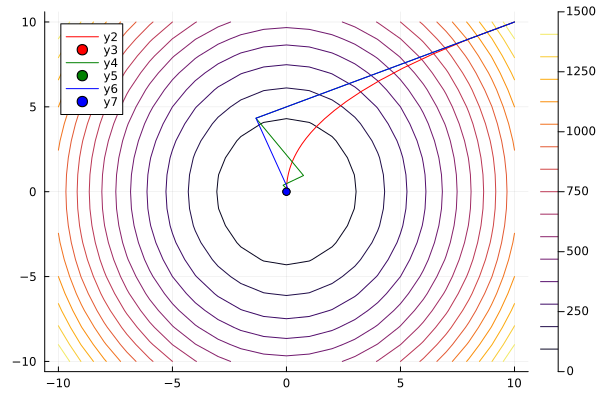

In [322]:
x_min, hist = grad_d(f, [10., 10.], 0.01, 0.001, 0.01)
println(length(hist))
contour(xs1, ys1, f)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
x_min, hist = score_grad_d(f, [10., 10.], 0.001, 0.01)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:green)
scatter!([x_min[1]], [x_min[2]], color=:green)
x_min, hist = sopr_grad_d(f, [10., 10.], 0.001, 0.01)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:blue)
scatter!([x_min[1]], [x_min[2]], color=:blue)

42025
549
66


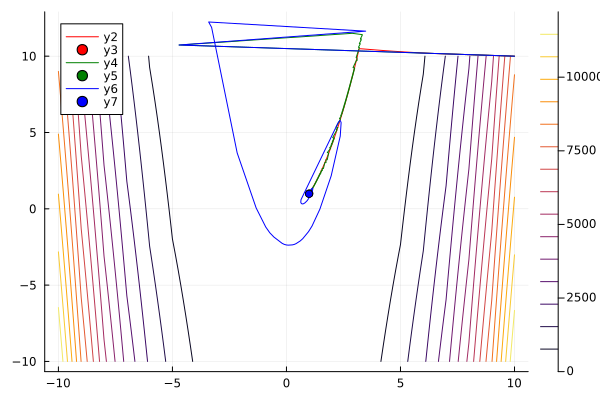

In [323]:
x_min, hist = grad_d(banan, [10., 10.], 0.001, 0.0001, 0.01)
println(length(hist))
contour(xs1, ys1, banan)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
x_min, hist = score_grad_d(banan, [10., 10.], 0.0001, 0.01)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:green)
scatter!([x_min[1]], [x_min[2]], color=:green)
x_min, hist = sopr_grad_d(banan, [10., 10.], 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:blue)
scatter!([x_min[1]], [x_min[2]], color=:blue)

28


22
9


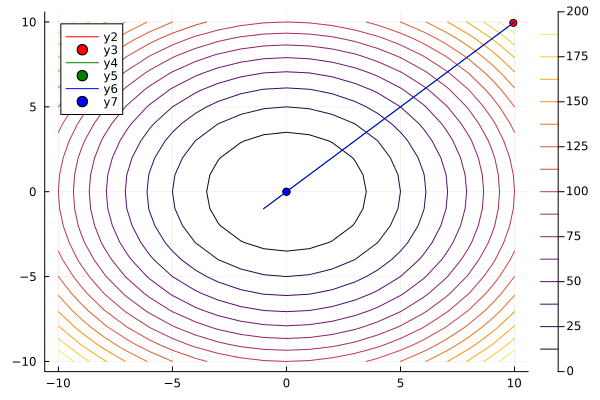

In [324]:
x_min, hist = grad_d(rastrigin, [10., 10.], 0.001, 0.0001, 0.01)
println(length(hist))
contour(xs1, ys1, rastrigin)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
x_min, hist = score_grad_d(rastrigin, [10., 10.], 0.0001, 0.01)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:green)
scatter!([x_min[1]], [x_min[2]], color=:green)
x_min, hist = sopr_grad_d(rastrigin, [10., 10.], 0.0001, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:blue)
scatter!([x_min[1]], [x_min[2]], color=:blue)

41125
37
17


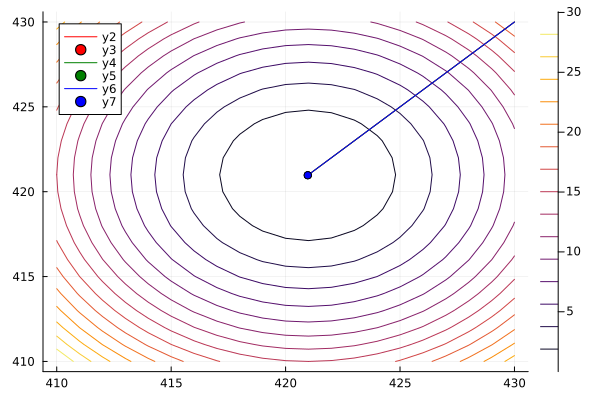

In [325]:
x_min, hist = grad_d(schwefel, [430.0,  430.0], 0.001, 0.0001, 0.01)
println(length(hist))
contour(xs2, ys2, schwefel)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
x_min, hist = score_grad_d(schwefel, [430.0,  430.0], 0.0001, 0.01)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:green)
scatter!([x_min[1]], [x_min[2]], color=:green)
x_min, hist = sopr_grad_d(schwefel, [430.0,  430.0], 0.0001, 0.01)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:blue)
scatter!([x_min[1]], [x_min[2]], color=:blue)